In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
from tqdm import tqdm

# 1. Simple Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 2. Dataset Handling
class QuickDrawDataset(Dataset):
    def __init__(self, root_dir, categories, max_samples_per_class=10000):
        self.root_dir = root_dir
        self.categories = categories
        self.max_samples_per_class = max_samples_per_class
        self.data = []
        self.labels = []
        
        for i, category in enumerate(categories):
            file_name = 'full_numpy_bitmap_' + category + '.npy'
            file_path = os.path.join(root_dir, file_name)
            category_data = np.load(file_path)
            samples = min(len(category_data), max_samples_per_class)
            self.data.append(category_data[:samples])
            self.labels.extend([i] * samples)
        
        self.data = np.vstack(self.data).reshape(-1, 28, 28).astype(np.float32) / 255.0
        self.labels = np.array(self.labels, dtype=np.int64)  # Change to int64

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = torch.from_numpy(self.data[idx])
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Ensure label is a LongTensor
        return image, label

# Define categories (you can add more)
categories = ['apple', 'banana', 'car', 'dog', 'house']

# Create dataset and dataloader
dataset = QuickDrawDataset('./', categories)
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)


In [16]:

# Initialize model, loss function, and optimizer
input_size = 28 * 28  # 28x28 pixel images
hidden_size = 256
num_classes = len(categories)

model = SimpleNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [17]:


# # 3. Training Loop
# def train_model(model, train_loader, criterion, optimizer, num_epochs=10, checkpoint_path='model_checkpoint.pth'):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model.to(device)
    
#     for epoch in range(num_epochs):
#         model.train()
#         running_loss = 0.0
#         correct = 0
#         total = 0
        
#         for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
#             images, labels = images.to(device), labels.to(device)
            
#             optimizer.zero_grad()
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
            
#             running_loss += loss.item()
#             _, predicted = outputs.max(1)
#             total += labels.size(0)
#             correct += predicted.eq(labels).sum().item()
        
#         epoch_loss = running_loss / len(train_loader)
#         epoch_acc = correct / total
        
#         print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
        
#         # Save checkpoint
#         torch.save({
#             'epoch': epoch,
#             'model_state_dict': model.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             'loss': epoch_loss,
#         }, checkpoint_path)

# # Train the model
# train_model(model, train_loader, criterion, optimizer)

# # Load a checkpoint (if needed)
# def load_checkpoint(model, optimizer, checkpoint_path):
#     checkpoint = torch.load(checkpoint_path)
#     model.load_state_dict(checkpoint['model_state_dict'])
#     optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
#     epoch = checkpoint['epoch']
#     loss = checkpoint['loss']
#     return model, optimizer, epoch, loss

# # Uncomment the following line to load a checkpoint
# # model, optimizer, start_epoch, loss = load_checkpoint(model, optimizer, 'model_checkpoint.pth')

Epoch 1/10: 100%|██████████| 782/782 [00:02<00:00, 281.24it/s]


Epoch 1/10, Loss: 0.0286, Accuracy: 0.8858


Epoch 2/10: 100%|██████████| 782/782 [00:02<00:00, 310.25it/s]


Epoch 2/10, Loss: 0.0232, Accuracy: 0.9262


Epoch 3/10: 100%|██████████| 782/782 [00:02<00:00, 295.31it/s]


Epoch 3/10, Loss: 0.0189, Accuracy: 0.9390


Epoch 4/10: 100%|██████████| 782/782 [00:02<00:00, 279.72it/s]


Epoch 4/10, Loss: 0.0187, Accuracy: 0.9488


Epoch 5/10: 100%|██████████| 782/782 [00:02<00:00, 332.88it/s]


Epoch 5/10, Loss: 0.0146, Accuracy: 0.9562


Epoch 6/10: 100%|██████████| 782/782 [00:02<00:00, 352.36it/s]


Epoch 6/10, Loss: 0.0124, Accuracy: 0.9642


Epoch 7/10: 100%|██████████| 782/782 [00:02<00:00, 332.17it/s]


Epoch 7/10, Loss: 0.0110, Accuracy: 0.9704


Epoch 8/10: 100%|██████████| 782/782 [00:03<00:00, 235.26it/s]


Epoch 8/10, Loss: 0.0081, Accuracy: 0.9768


Epoch 9/10: 100%|██████████| 782/782 [00:03<00:00, 221.42it/s]


Epoch 9/10, Loss: 0.0065, Accuracy: 0.9828


Epoch 10/10: 100%|██████████| 782/782 [00:03<00:00, 216.85it/s]


Epoch 10/10, Loss: 0.0051, Accuracy: 0.9871


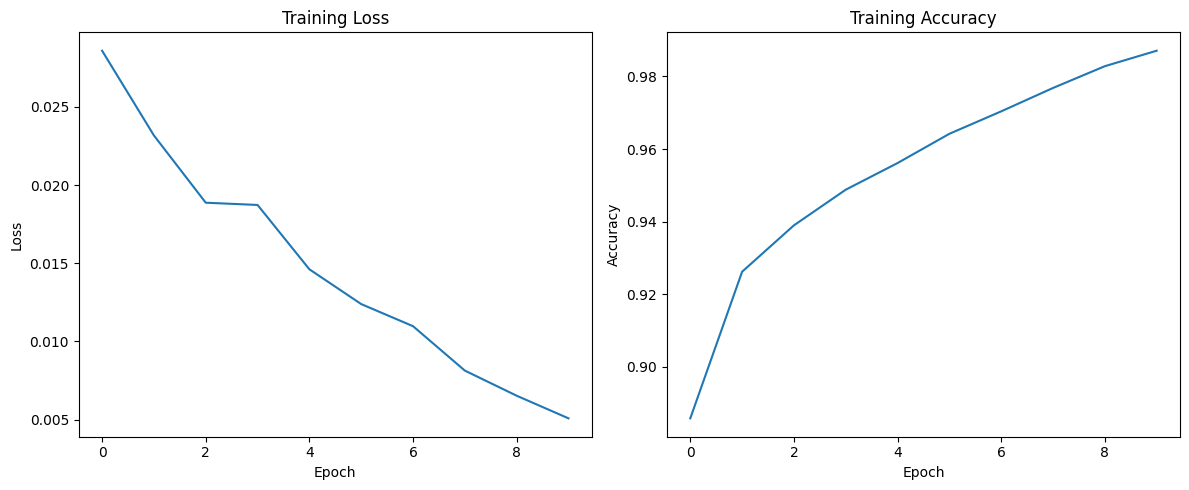

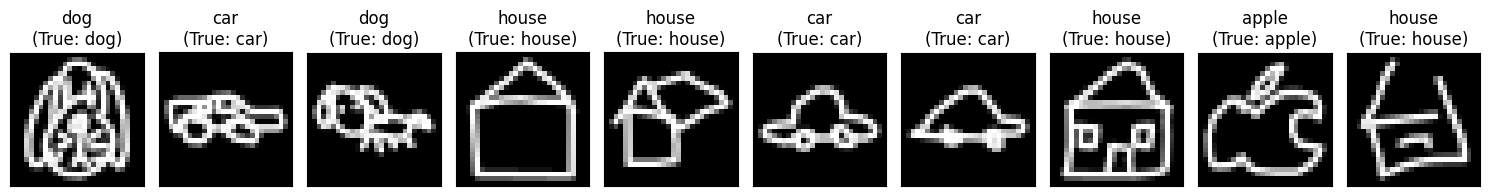

Training complete. You can view the TensorBoard logs by running:
tensorboard --logdir=runs


In [18]:
from torch.utils.tensorboard import SummaryWriter
from matplotlib import pyplot as plt

writer = SummaryWriter('runs/quickdraw_experiment')

def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    # Lists to store metrics for plotting
    train_losses = []
    train_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for i, (images, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            # Log to TensorBoard every 100 batches
            if i % 100 == 99:
                writer.add_scalar('training loss', running_loss / 100, epoch * len(train_loader) + i)
                writer.add_scalar('accuracy', 100. * correct / total, epoch * len(train_loader) + i)
                running_loss = 0.0
        
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total
        
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
        
        # Log histograms of model parameters
        for name, param in model.named_parameters():
            writer.add_histogram(name, param.clone().cpu().data.numpy(), epoch)
    
    # Close the TensorBoard writer
    writer.close()
    
    return train_losses, train_accuracies

# Train the model
model = SimpleNN(input_size=28*28, hidden_size=256, num_classes=len(categories))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, train_accuracies = train_model(model, train_loader, criterion, optimizer)

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.savefig('training_metrics.png')
plt.show()

# Log the plot to TensorBoard
writer = SummaryWriter('runs/quickdraw_experiment')
writer.add_figure('training_metrics', plt.gcf())
writer.close()

# Visualize some predictions
def visualize_predictions(model, dataloader, num_images=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    images, labels = next(iter(dataloader))
    images = images.to(device)[:num_images]
    labels = labels[:num_images]
    
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
    
    fig = plt.figure(figsize=(15, 3))
    for i in range(num_images):
        ax = fig.add_subplot(1, num_images, i+1, xticks=[], yticks=[])
        ax.imshow(images[i].cpu().squeeze(), cmap='gray')
        ax.set_title(f"{categories[predicted[i]]}\n(True: {categories[labels[i]]})")
    
    plt.tight_layout()
    plt.savefig('predictions.png')
    plt.show()
    
    # Log the predictions to TensorBoard
    writer = SummaryWriter('runs/quickdraw_experiment')
    writer.add_figure('predictions', plt.gcf())
    writer.close()

visualize_predictions(model, train_loader)

print("Training complete. You can view the TensorBoard logs by running:")
print("tensorboard --logdir=runs")